<a href="https://colab.research.google.com/github/eliyanto29/My-Academics-Paper-On-Data-Science/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentimen Analisis Bahasa Indonesia Menggunakan Python**

## Data Cleansing & Preparation

### Mengakses Dataset

In [ ]:
from google.colab import drive
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/eliyanto29/My-Academics-Paper-On-Data-Science/master/Sentiment%20Analisis/21Sept-2Okt/Gibran-Teguh-21Sept-2Okt.csv")
df.tail()

,screen_name,lang,created_at,fav_count,retweet_count,text,location
907,AbellineB,in,9/21/2020 8:28,0,0,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...,"Tuscany, Amsterdam, Denpasar"
908,AbellineB,in,9/21/2020 8:27,0,0,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...,"Tuscany, Amsterdam, Denpasar"
909,DetaxId,in,9/21/2020 8:13,0,0,[Hoax] Presiden Jadi Tim Sukses Gibran-Teguh h...,NaN
910,tribunsolocom,in,9/21/2020 3:19,0,0,Visi-Misi Pilkada 2020 Gibran - Teguh: Kota So...,"Karanganyar, Jawa Tengah"
911,SeputariNews,in,9/21/2020 3:00,1,0,Partai Perindo Resmi Dukung Pasangan Gibran-Te...,MNC News Center Lt.11 Jakarta


In [ ]:
tweet_data0=df[['created_at','text']]
tweet_data0

,created_at,text
0,10/2/2020 22:49,Populer nusantara antara lain konlik antara Ka...
1,10/2/2020 22:16,RT @DiniHrdianti: Sandiaga Uno menjadi juru ka...
2,10/2/2020 21:51,RT @OposisiCerdas: Sandiaga Uno Jadi Juru Kamp...
3,10/2/2020 21:38,RT @DiniHrdianti: Sandiaga Uno menjadi juru ka...
4,10/2/2020 20:43,~Ninggal Tatu~\n\nKowe tak sayang-sayang saiki...
...,...,...
907,9/21/2020 8:28,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...
908,9/21/2020 8:27,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...
909,9/21/2020 8:13,[Hoax] Presiden Jadi Tim Sukses Gibran-Teguh h...
910,9/21/2020 3:19,Visi-Misi Pilkada 2020 Gibran - Teguh: Kota So...


In [ ]:
#Menghapus teks yang sama
tweet_data = tweet_data0.drop_duplicates(subset=['text'], keep='first')
tweet_data
#print(tweet_data)
#print(len(tweet_data0))
#print(len(tweet_data))

,created_at,text
0,10/2/2020 22:49,Populer nusantara antara lain konlik antara Ka...
1,10/2/2020 22:16,RT @DiniHrdianti: Sandiaga Uno menjadi juru ka...
2,10/2/2020 21:51,RT @OposisiCerdas: Sandiaga Uno Jadi Juru Kamp...
4,10/2/2020 20:43,~Ninggal Tatu~\n\nKowe tak sayang-sayang saiki...
5,10/2/2020 19:31,RT @Kanseulir: Sandi Uno Jadi Juru Kampanye Gi...
...,...,...
907,9/21/2020 8:28,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...
908,9/21/2020 8:27,Saat Menghadiri “Deklarasi Adaptasi Kebiasaan ...
909,9/21/2020 8:13,[Hoax] Presiden Jadi Tim Sukses Gibran-Teguh h...
910,9/21/2020 3:19,Visi-Misi Pilkada 2020 Gibran - Teguh: Kota So...


### Case Folding



Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter. 

Ada beberapa cara yang dapat digunakan dalam tahap case folding, diantaranya:
* Mengubah text menjadi lowercase
* Menghapus alamat web
* Menghapus emotikon
* Menghapus angka
* Menghapus akun name
* Menghapus rt tag
* Menghapus tanda baca
* Menghapus whitepace (karakter kosong)


In [ ]:
#Mengubah text menjadi lowercase
tweet_data_1=[]
for teks in tweet_data.text:
  teks_process = [teks.lower()]
  tweet_data_1=tweet_data_1+teks_process
print(tweet_data_1)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… https://t.co/axdnesh2yo', 'rt @dinihrdianti: sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', 'rt @oposisicerdas: sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\nhttps://t.co/relkqnvlvg', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' 🎶\ntresnamu karo aku, kuwi mung kiasan🎶\nkowe tak gadhang… https://t.co/ki4krlu8x8", 'rt @kanseulir: sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… https://t.co/bebznta6wt', 'rt @kompascom: selain sandiaga uno, ada nama besar lain yang juga akan menj

In [ ]:
#Menghapus alamat web
tweet_data_2=[]
for teks in tweet_data_1:
  teks_process = [re.sub(r"http\S+", "", teks)]
  tweet_data_2=tweet_data_2+teks_process
print(tweet_data_2)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', 'rt @dinihrdianti: sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', 'rt @oposisicerdas: sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\n', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' 🎶\ntresnamu karo aku, kuwi mung kiasan🎶\nkowe tak gadhang… ", 'rt @kanseulir: sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… ', 'rt @kompascom: selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada2020  \n ', 'respons kabar sandiaga bakal j

In [ ]:
#Menghapus emoji
tweet_data_3=[]
for teks in tweet_data_2:
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  teks_process = [regrex_pattern.sub(r'',teks)]
  tweet_data_3=tweet_data_3+teks_process
print(tweet_data_3)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', 'rt @dinihrdianti: sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', 'rt @oposisicerdas: sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\n', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' \ntresnamu karo aku, kuwi mung kiasan\nkowe tak gadhang… ", 'rt @kanseulir: sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… ', 'rt @kompascom: selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada2020  \n ', 'respons kabar sandiaga bakal jad

In [ ]:
#Menghapus angka
tweet_data_4=[]
for teks in tweet_data_3:
  teks_process = [re.sub(r"\d+", "", teks)]
  tweet_data_4=tweet_data_4+teks_process
print(tweet_data_4)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', 'rt @dinihrdianti: sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', 'rt @oposisicerdas: sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\n', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' \ntresnamu karo aku, kuwi mung kiasan\nkowe tak gadhang… ", 'rt @kanseulir: sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… ', 'rt @kompascom: selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada  \n ', 'respons kabar sandiaga bakal jadi ju

In [ ]:
#Menghapus @akun_name
tweet_data_5=[]
for teks in tweet_data_4:
  teks_process = [re.sub('@[^\s]+','',teks)]
  tweet_data_5=tweet_data_5+teks_process
print(tweet_data_5)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', 'rt  sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', 'rt  sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\n', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' \ntresnamu karo aku, kuwi mung kiasan\nkowe tak gadhang… ", 'rt  sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… ', 'rt  selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada  \n ', 'respons kabar sandiaga bakal jadi jurkam, gibran rancang kampanye daring: wakil ketua d

In [ ]:
#Menghapus "rt"
tweet_data_6=[]
for teks in tweet_data_5:
  teks_process = [re.sub('rt ','',teks)]
  tweet_data_6=tweet_data_6+teks_process
print(tweet_data_6)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', ' sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', ' sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi\n', "~ninggal tatu~\n\nkowe tak sayang-sayang saiki malah ngilang' \ntresnamu karo aku, kuwi mung kiasan\nkowe tak gadhang… ", ' sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.\n\nperjuangan bapak perbaiki mart… ', ' selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada  \n ', 'respons kabar sandiaga bakal jadi jurkam, gibran rancang kampanye daring: wakil ketua dewan pembina

In [ ]:
#Menghapus "\n"
tweet_data_7=[]
for teks in tweet_data_6:
  teks_process = [re.sub('\n','',teks)]
  tweet_data_7=tweet_data_7+teks_process
print(tweet_data_7)

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara. sementara di solo, sandiaga ipers… ', ' sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo, gibran rakabuming raka-teguh prakos…', ' sandiaga uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi', "~ninggal tatu~kowe tak sayang-sayang saiki malah ngilang' tresnamu karo aku, kuwi mung kiasankowe tak gadhang… ", ' sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.perjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibran-teguh di pilkada solo, disebut ada lobi jokowi.perjuangan bapak perbaiki mart… ', ' selain sandiaga uno, ada nama besar lain yang juga akan menjadi jurkam paslon gibran-teguh di solo | #pilkada   ', 'respons kabar sandiaga bakal jadi jurkam, gibran rancang kampanye daring: wakil ketua dewan pembina partai gerindra… ',

In [ ]:
#Menghapus tanda baca
import string
tweet_data_8=[]
for teks in tweet_data_7:
  teks_process = [teks.translate(str.maketrans("","",string.punctuation))]
  tweet_data_8=tweet_data_8+teks_process
print(tweet_data_8)


['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara sementara di solo sandiaga ipers… ', ' sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo gibran rakabuming rakateguh prakos…', ' sandiaga uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowi', 'ninggal tatukowe tak sayangsayang saiki malah ngilang tresnamu karo aku kuwi mung kiasankowe tak gadhang… ', ' sandi uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowiperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowiperjuangan bapak perbaiki mart… ', ' selain sandiaga uno ada nama besar lain yang juga akan menjadi jurkam paslon gibranteguh di solo  pilkada   ', 'respons kabar sandiaga bakal jadi jurkam gibran rancang kampanye daring wakil ketua dewan pembina partai gerindra… ', 'selain sandiaga uno a

In [ ]:
#Menghapus whitepace (karakter kosong)
tweet_data_9=[]
for teks in tweet_data_8:
  teks_process = [teks.strip()]
  tweet_data_9=tweet_data_9+teks_process
print(tweet_data_9)
print(len(tweet_data_9))

['populer nusantara antara lain konlik antara kapolres blitar dengan kasat sabhara sementara di solo sandiaga ipers…', 'sandiaga uno menjadi juru kampanye pasangan calon wali kota dan wakil wali kota solo gibran rakabuming rakateguh prakos…', 'sandiaga uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowi', 'ninggal tatukowe tak sayangsayang saiki malah ngilang tresnamu karo aku kuwi mung kiasankowe tak gadhang…', 'sandi uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowiperjuangan bapak perbaiki martabak anak…', 'tidur dulu ah sakit badan nihh', 'nyeri awak', 'ngantukkkk', 'sandi uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowiperjuangan bapak perbaiki mart…', 'selain sandiaga uno ada nama besar lain yang juga akan menjadi jurkam paslon gibranteguh di solo  pilkada', 'respons kabar sandiaga bakal jadi jurkam gibran rancang kampanye daring wakil ketua dewan pembina partai gerindra…', 'selain sandiaga uno ada nama bes

In [ ]:
tanggal=tweet_data.created_at

In [ ]:
tweet_data1 = pd.DataFrame(list(zip(tanggal, tweet_data_9)), 
               columns =['tanggal', 'teks']) 
tweet_data1 

,tanggal,teks
0,10/2/2020 22:49,populer nusantara antara lain konlik antara ka...
1,10/2/2020 22:16,sandiaga uno menjadi juru kampanye pasangan ca...
2,10/2/2020 21:51,sandiaga uno jadi juru kampanye gibranteguh di...
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki malah ...
4,10/2/2020 19:31,sandi uno jadi juru kampanye gibranteguh di pi...
...,...,...
423,9/21/2020 8:28,saat menghadiri “deklarasi adaptasi kebiasaan ...
424,9/21/2020 8:27,saat menghadiri “deklarasi adaptasi kebiasaan ...
425,9/21/2020 8:13,hoax presiden jadi tim sukses gibranteguh via
426,9/21/2020 3:19,visimisi pilkada gibran teguh kota solo seba...


In [ ]:
#Menghapus teks yang sama
tweet_data1 = tweet_data1.drop_duplicates(subset=['teks'], keep='first')
tweet_data1
#print(tweet_data)
#print(len(tweet_data0))
#print(len(tweet_data))

,tanggal,teks
0,10/2/2020 22:49,populer nusantara antara lain konlik antara ka...
1,10/2/2020 22:16,sandiaga uno menjadi juru kampanye pasangan ca...
2,10/2/2020 21:51,sandiaga uno jadi juru kampanye gibranteguh di...
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki malah ...
4,10/2/2020 19:31,sandi uno jadi juru kampanye gibranteguh di pi...
...,...,...
420,9/21/2020 8:30,perindo dukung pasangan gibran teguh jadi wal...
421,9/21/2020 8:29,saat menghadiri “deklarasi adaptasi kebiasaan ...
425,9/21/2020 8:13,hoax presiden jadi tim sukses gibranteguh via
426,9/21/2020 3:19,visimisi pilkada gibran teguh kota solo seba...


### Stemming

In [ ]:
import json

In [ ]:
d = open('/content/gdrive/My Drive/Sentimen Analisis/stopword.txt', "r")
root_word = set(d.read().splitlines())
#root_word

In [ ]:
f = open('/content/gdrive/My Drive/Sentimen Analisis/lemma_dict.json') 
lemma_dict = json.load(f)

In [ ]:
def stem1(word):
        if word.endswith(("lah", "kah", "pun")):
            return word[:-3]
        else:
            return word

In [ ]:
def stem2(word):
        if word.startswith("ku"):
            return word[2:]
        elif word.startswith("kau"):
            return word[3:]
        else:
            return word

In [ ]:
def stem3(word):
        if word.endswith(("ku", "mu")):
            return word[:-2]
        elif word.endswith("nya"):
            return word[:-3]
        else:
            return word

In [ ]:
def stem4(word):
        if word.endswith("kan"):
            return [word[:-3], word[:-2]]
        elif word.endswith("an"):
            return word[:-2]
        elif word.endswith("isasi"):
            return word[:-5]
        elif word.endswith("i"):
            return word[:-1]
        elif word.endswith("isme"):
            return word[:-4]
        else:
            return word

In [ ]:
def stem5(word):
        if word.startswith(("di", "ke", "se")):
            return word[2:]
        else:
            return word

In [ ]:
def lemmatize(text):
        final_result = ""
        suffix = set(["lah", "kah", "pun", "ku", "mu", "nya"])
        text = text.lower()
        text = re.sub("[^a-zA-Z0-9-]+", " ", text)
        for word in text.split():
            result = word.lower()
            if word.isdigit() or len(word) <= 3 or word in root_word:
                result = word.lower()
            elif word in lemma_dict:
                result = lemma_dict[word]
            else:
                word1 = stem1(word)
                word2 = stem2(word)
                word13 = stem3(word1)
                word134 = stem4(word13)
                word25 = stem5(word2)
                if word1 in root_word:
                    result = word1
                elif word1 in lemma_dict:
                    result = lemma_dict[word1]
                elif word2 in root_word:
                    result = word2
                elif word2 in lemma_dict:
                    result = lemma_dict[word2]
                elif word13 in root_word:
                    result = word13
                elif word13 in lemma_dict:
                    result = lemma_dict[word13]
                elif len(word134) > 0:
                    if isinstance(word134, list):
                        for w in word134:
                            if w in root_word:
                                result = w
                            elif w in lemma_dict:
                                result = lemma_dict[w]
                    elif word134 in root_word:
                        result = word134
                    elif word134 in lemma_dict:
                        result = lemma_dict[word134]
                if result == word.lower():
                    if word25 in root_word:
                        result = word25
                    elif word25 in lemma_dict:
                        result = lemma_dict[word25]
                    else:
                        word12 = stem2(word1)
                        word125 = stem1(word25)
                        if word12 in root_word:
                            result = word12
                        elif word12 in lemma_dict:
                            result = lemma_dict[word12]
                        elif word125 in root_word:
                            result = word125
                        elif word125 in lemma_dict:
                            result = lemma_dict[word125]
                        else:
                            word123 = stem3(word12)
                            word1234 = stem4(word123)
                            word1235 = stem5(word123)
                            if word123 in root_word:
                                result = word123
                            elif word123 in lemma_dict:
                                result = lemma_dict[word123]
                            elif len(word1234) > 0:
                                if isinstance(word1234, list):
                                    for w in word1234:
                                        if w in root_word:
                                            result = w
                                        elif w in lemma_dict:
                                            result = lemma_dict[w]
                                elif word1234 in root_word:
                                    result = word1234
                                elif word1234 in lemma_dict:
                                    result = lemma_dict[word1234]
                            if result == word.lower():
                                if word1235 in root_word:
                                    result = word1235
                                elif word1235 in lemma_dict:
                                    result = lemma_dict[word1235]
                                else:
                                    word12345 = stem4(word1235)
                                    if len(word12345) > 0:
                                        if isinstance(word12345, list):
                                            for w in word12345:
                                                if w in root_word:
                                                    result = w
                                                elif w in lemma_dict:
                                                    result = lemma_dict[
                                                        w
                                                    ]
                                        elif word12345 in root_word:
                                            result = word12345
                                        elif word12345 in lemma_dict:
                                            result = lemma_dict[
                                                word12345
                                            ]
                                    # kepada-Nya --> kepada
                                    # anggota-anggota --> anggota
                                    if result == word.lower() and "-" in word:
                                        lemma_list = [
                                            lemma_dict.get(i, i)
                                            for i in word.split("-")
                                        ]
                                        if (
                                            len(set(lemma_list)) == 2
                                            and word.split("-")[1] in suffix
                                        ) or len(set(lemma_list)) == 1:
                                            if (
                                                lemma_list[0]
                                                in root_word
                                            ):
                                                result = lemma_list[0]
            final_result += " {}".format(result)
        return final_result.strip()

In [ ]:
print(len(tweet_data))
lemm=[]
for teks in tweet_data1.teks:
  lemm1=[lemmatize(teks)]
  lemm=lemm+lemm1
print(len(lemm))
tweet_data=lemm

357
357


In [ ]:
tweet_data1

,tanggal,teks
0,10/2/2020 22:49,populer nusantara antara lain konlik antara ka...
1,10/2/2020 22:16,sandiaga uno menjadi juru kampanye pasangan ca...
2,10/2/2020 21:51,sandiaga uno jadi juru kampanye gibranteguh di...
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki malah ...
4,10/2/2020 19:31,sandi uno jadi juru kampanye gibranteguh di pi...
...,...,...
420,9/21/2020 8:30,perindo dukung pasangan gibran teguh jadi wal...
421,9/21/2020 8:29,saat menghadiri “deklarasi adaptasi kebiasaan ...
425,9/21/2020 8:13,hoax presiden jadi tim sukses gibranteguh via
426,9/21/2020 3:19,visimisi pilkada gibran teguh kota solo seba...


### Stopword

In [ ]:
s = open('/content/gdrive/My Drive/Sentimen Analisis/stopword.txt', "r")
stopword = set(s.read().splitlines())
#stopword

In [ ]:
def remove_stopword(text):
  temp_result = []
  parts = []
  for match in re.finditer(r'[^.,?!\s]+|[.,?!]', text):
    parts.append(match.group())
  
  for word in parts:
    if word.casefold() not in stopword:
      temp_result.append(word)

  result_cand = ' '.join(temp_result)
  result = re.sub(r' ([^A-Za-z0-9])', r'\1', result_cand)

  return result

In [ ]:
coba=tweet_data[2]
coba1=remove_stopword(coba)
print(coba)
print(coba1)

sandiaga uno jadi juru kampanye gibranteguh di pilkada solo disebut ada lobi jokowi
sandiaga uno kampanye gibranteguh pilkada solo lobi jokowi


In [ ]:
sw=[]
for teks in tweet_data:
  sw1=[remove_stopword(teks)]
  sw=sw+sw1
print(len(sw))
sw
tweet_data=sw

357


In [ ]:
sw

['populer nusantara konlik kapolres blitar kasat sabhara solo sandiaga ipers',
 'sandiaga uno kampanye pasang calon wali kota wakil wali kota solo gibran rakabuming rakateguh prakos',
 'sandiaga uno kampanye gibranteguh pilkada solo lobi jokowi',
 'ninggal tatukowe tak sayangsayang saiki ngilang tresnamu karo kuwi mung kiasankowe tak gadhang',
 'sandi uno kampanye gibranteguh pilkada solo lobi jokowiperjuangan bapak martabak anak',
 'tidur ah sakit badan nihh',
 'nyeri awak',
 'ngantukkkk',
 'sandi uno kampanye gibranteguh pilkada solo lobi jokowiperjuangan bapak mart',
 'sandiaga uno nama besar jurkam paslon gibranteguh solo pilkada',
 'respons kabar sandiaga jurkam gibran rancang kampanye daring wakil ketua dewan bina partai gerindra',
 'baca bom blog',
 'sandiaga uno kampanye gibranteguh pilkada solo lobi jokowi borong medan solo htt',
 'hoammmmmm',
 'gibran teguh pilkada sesuai jadwal demokratis aman covid',
 'solo ber gibran teguh pilih',
 'gibran teguh nomor urut pilkada solo pa'

In [ ]:
tanggal1 = tweet_data1.tanggal
tweet_data2 = pd.DataFrame(list(zip(tanggal1, tweet_data)), 
               columns =['tanggal', 'teks']) 
tweet_data2 

,tanggal,teks
0,10/2/2020 22:49,populer nusantara konlik kapolres blitar kasat...
1,10/2/2020 22:16,sandiaga uno kampanye pasang calon wali kota w...
2,10/2/2020 21:51,sandiaga uno kampanye gibranteguh pilkada solo...
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki ngilan...
4,10/2/2020 19:31,sandi uno kampanye gibranteguh pilkada solo lo...
...,...,...
352,9/21/2020 8:30,perindo dukung pasang gibran teguh wali kota w...
353,9/21/2020 8:29,hadir deklarasi adaptasi dukung cepat tangan c...
354,9/21/2020 8:13,hoax presiden tim sukses gibranteguh
355,9/21/2020 3:19,visimisi pilkada gibran teguh kota solo kota b...


## Text Data Visualization

### Bar Chart

In [ ]:
token=[]
for teks in tweet_data2.teks:
  token1=teks.split()
  token=token+token1
print(len(token))
tweet_data_token=token

3268


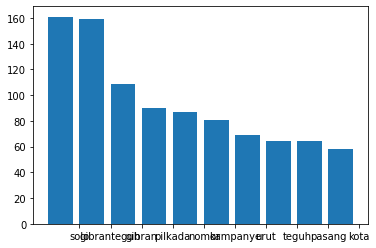

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = token

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]
indSort = indSort[0:10]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.6

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [ ]:
labels

array(['solo', 'gibranteguh', 'gibran', 'pilkada', 'nomor', 'kampanye',
       'urut', 'teguh', 'pasang', 'kota'], dtype='<U38')

In [ ]:
values

array([161, 159, 109,  90,  87,  81,  69,  64,  64,  58])

# **Sentiment Generation Using Lexicon Based Method**

In [ ]:
positive = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/positive.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)

negative = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/negative.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [ ]:
tweet_data2.head()

,tanggal,teks
0,10/2/2020 22:49,populer nusantara konlik kapolres blitar kasat...
1,10/2/2020 22:16,sandiaga uno kampanye pasang calon wali kota w...
2,10/2/2020 21:51,sandiaga uno kampanye gibranteguh pilkada solo...
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki ngilan...
4,10/2/2020 19:31,sandi uno kampanye gibranteguh pilkada solo lo...


In [ ]:
tweet_data2=tweet_data2.drop(tweet_data2[tweet_data2.teks.map(len)==0].index)

In [ ]:
a=0
for i in df.clean_text:
  kata_positif= len(re.findall(positive, i))
  #print(kata_positif)
  jumlah_kata = len(i.split())
  #print(jumlah_kata)
  positive_score = kata_positif/jumlah_kata
  #print(positive_score)
  a=a+1
  #print(a)

In [ ]:
tweet_data2['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in tweet_data2.teks]
tweet_data2['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in tweet_data2.teks]

In [ ]:
tweet_data2['label'] = ['positive' if tweet_data2.iloc[i].positive >= tweet_data2.iloc[i].negative else 'negative' for i in range(tweet_data2.shape[0])]

In [ ]:
tweet_data2['score'] = tweet_data2['positive']- tweet_data2['negative']

In [ ]:
def sentimen(df):
    if tweet_data2['score'] > 0:
        val = "Positive"
    elif tweet_data2['score'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
tweet_data2['label'].value_counts()

positive    298
negative     57
Name: label, dtype: int64

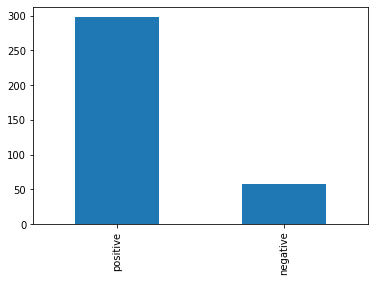

In [ ]:
tweet_data2['label'].value_counts().plot(kind='bar');

In [ ]:
tweet_data2

,tanggal,teks,positive,negative,label,score
0,10/2/2020 22:49,populer nusantara konlik kapolres blitar kasat...,0.100000,0.000000,positive,0.100000
1,10/2/2020 22:16,sandiaga uno kampanye pasang calon wali kota w...,0.266667,0.066667,positive,0.200000
2,10/2/2020 21:51,sandiaga uno kampanye gibranteguh pilkada solo...,0.125000,0.000000,positive,0.125000
3,10/2/2020 20:43,ninggal tatukowe tak sayangsayang saiki ngilan...,0.153846,0.153846,positive,0.000000
4,10/2/2020 19:31,sandi uno kampanye gibranteguh pilkada solo lo...,0.090909,0.181818,negative,-0.090909
...,...,...,...,...,...,...
352,9/21/2020 8:30,perindo dukung pasang gibran teguh wali kota w...,0.090909,0.090909,positive,0.000000
353,9/21/2020 8:29,hadir deklarasi adaptasi dukung cepat tangan c...,0.200000,0.100000,positive,0.100000
354,9/21/2020 8:13,hoax presiden tim sukses gibranteguh,0.400000,0.000000,positive,0.400000
355,9/21/2020 3:19,visimisi pilkada gibran teguh kota solo kota b...,0.250000,0.000000,positive,0.250000


## DATA KEDUA

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/eliyanto29/My-Academics-Paper-On-Data-Science/master/Sentiment%20Analisis/21Sept-2Okt/Gibran-Teguh-21Sept-2Okt.csv")
df.tail()

In [ ]:
#Menghapus teks yang sama
tweet_data = tweet_data0.drop_duplicates(subset=['text'], keep='first')
tweet_data
#print(tweet_data)
#print(len(tweet_data0))
#print(len(tweet_data))

In [ ]:
tweet_data_1=[]
for teks in tweet_data.text:
  teks_process = [teks.lower()]
  tweet_data_1=tweet_data_1+teks_process
print(tweet_data_1)

In [ ]:
#Menghapus alamat web
tweet_data_2=[]
for teks in tweet_data_1:
  teks_process = [re.sub(r"http\S+", "", teks)]
  tweet_data_2=tweet_data_2+teks_process
print(tweet_data_2)

In [ ]:
#Menghapus emoji
tweet_data_3=[]
for teks in tweet_data_2:
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
  teks_process = [regrex_pattern.sub(r'',teks)]
  tweet_data_3=tweet_data_3+teks_process
print(tweet_data_3)

In [ ]:
#Menghapus angka
tweet_data_4=[]
for teks in tweet_data_3:
  teks_process = [re.sub(r"\d+", "", teks)]
  tweet_data_4=tweet_data_4+teks_process
print(tweet_data_4)

In [ ]:
#Menghapus @akun_name
tweet_data_5=[]
for teks in tweet_data_4:
  teks_process = [re.sub('@[^\s]+','',teks)]
  tweet_data_5=tweet_data_5+teks_process
print(tweet_data_5)

In [ ]:
#Menghapus "rt"
tweet_data_6=[]
for teks in tweet_data_5:
  teks_process = [re.sub('rt ','',teks)]
  tweet_data_6=tweet_data_6+teks_process
print(tweet_data_6)

In [ ]:
#Menghapus "\n"
tweet_data_7=[]
for teks in tweet_data_6:
  teks_process = [re.sub('\n','',teks)]
  tweet_data_7=tweet_data_7+teks_process
print(tweet_data_7)

In [ ]:
#Menghapus tanda baca
import string
tweet_data_8=[]
for teks in tweet_data_7:
  teks_process = [teks.translate(str.maketrans("","",string.punctuation))]
  tweet_data_8=tweet_data_8+teks_process
print(tweet_data_8)

In [ ]:
#Menghapus whitepace (karakter kosong)
tweet_data_9=[]
for teks in tweet_data_8:
  teks_process = [teks.strip()]
  tweet_data_9=tweet_data_9+teks_process
print(tweet_data_9)
print(len(tweet_data_9))

In [ ]:
tanggal=tweet_data.created_at

In [ ]:
tweet_data1 = pd.DataFrame(list(zip(tanggal, tweet_data_9)), 
               columns =['tanggal', 'teks']) 
tweet_data1 

In [ ]:
#Menghapus teks yang sama
tweet_data1 = tweet_data1.drop_duplicates(subset=['teks'], keep='first')
tweet_data1
#print(tweet_data)
#print(len(tweet_data0))
#print(len(tweet_data))

## STEMMING

In [ ]:
import json

In [ ]:
d = open('/content/gdrive/My Drive/Sentimen Analisis/stopword.txt', "r")
root_word = set(d.read().splitlines())
#root_word

In [ ]:
f = open('/content/gdrive/My Drive/Sentimen Analisis/lemma_dict.json') 
lemma_dict = json.load(f)

In [ ]:
def stem1(word):
        if word.endswith(("lah", "kah", "pun")):
            return word[:-3]
        else:
            return word

In [ ]:
def stem2(word):
        if word.startswith("ku"):
            return word[2:]
        elif word.startswith("kau"):
            return word[3:]
        else:
            return word

In [ ]:
def stem3(word):
        if word.endswith(("ku", "mu")):
            return word[:-2]
        elif word.endswith("nya"):
            return word[:-3]
        else:
            return word

In [ ]:
def stem4(word):
        if word.endswith("kan"):
            return [word[:-3], word[:-2]]
        elif word.endswith("an"):
            return word[:-2]
        elif word.endswith("isasi"):
            return word[:-5]
        elif word.endswith("i"):
            return word[:-1]
        elif word.endswith("isme"):
            return word[:-4]
        else:
            return word

In [ ]:
def stem5(word):
        if word.startswith(("di", "ke", "se")):
            return word[2:]
        else:
            return word

In [ ]:
def lemmatize(text):
        final_result = ""
        suffix = set(["lah", "kah", "pun", "ku", "mu", "nya"])
        text = text.lower()
        text = re.sub("[^a-zA-Z0-9-]+", " ", text)
        for word in text.split():
            result = word.lower()
            if word.isdigit() or len(word) <= 3 or word in root_word:
                result = word.lower()
            elif word in lemma_dict:
                result = lemma_dict[word]
            else:
                word1 = stem1(word)
                word2 = stem2(word)
                word13 = stem3(word1)
                word134 = stem4(word13)
                word25 = stem5(word2)
                if word1 in root_word:
                    result = word1
                elif word1 in lemma_dict:
                    result = lemma_dict[word1]
                elif word2 in root_word:
                    result = word2
                elif word2 in lemma_dict:
                    result = lemma_dict[word2]
                elif word13 in root_word:
                    result = word13
                elif word13 in lemma_dict:
                    result = lemma_dict[word13]
                elif len(word134) > 0:
                    if isinstance(word134, list):
                        for w in word134:
                            if w in root_word:
                                result = w
                            elif w in lemma_dict:
                                result = lemma_dict[w]
                    elif word134 in root_word:
                        result = word134
                    elif word134 in lemma_dict:
                        result = lemma_dict[word134]
                if result == word.lower():
                    if word25 in root_word:
                        result = word25
                    elif word25 in lemma_dict:
                        result = lemma_dict[word25]
                    else:
                        word12 = stem2(word1)
                        word125 = stem1(word25)
                        if word12 in root_word:
                            result = word12
                        elif word12 in lemma_dict:
                            result = lemma_dict[word12]
                        elif word125 in root_word:
                            result = word125
                        elif word125 in lemma_dict:
                            result = lemma_dict[word125]
                        else:
                            word123 = stem3(word12)
                            word1234 = stem4(word123)
                            word1235 = stem5(word123)
                            if word123 in root_word:
                                result = word123
                            elif word123 in lemma_dict:
                                result = lemma_dict[word123]
                            elif len(word1234) > 0:
                                if isinstance(word1234, list):
                                    for w in word1234:
                                        if w in root_word:
                                            result = w
                                        elif w in lemma_dict:
                                            result = lemma_dict[w]
                                elif word1234 in root_word:
                                    result = word1234
                                elif word1234 in lemma_dict:
                                    result = lemma_dict[word1234]
                            if result == word.lower():
                                if word1235 in root_word:
                                    result = word1235
                                elif word1235 in lemma_dict:
                                    result = lemma_dict[word1235]
                                else:
                                    word12345 = stem4(word1235)
                                    if len(word12345) > 0:
                                        if isinstance(word12345, list):
                                            for w in word12345:
                                                if w in root_word:
                                                    result = w
                                                elif w in lemma_dict:
                                                    result = lemma_dict[
                                                        w
                                                    ]
                                        elif word12345 in root_word:
                                            result = word12345
                                        elif word12345 in lemma_dict:
                                            result = lemma_dict[
                                                word12345
                                            ]
                                    # kepada-Nya --> kepada
                                    # anggota-anggota --> anggota
                                    if result == word.lower() and "-" in word:
                                        lemma_list = [
                                            lemma_dict.get(i, i)
                                            for i in word.split("-")
                                        ]
                                        if (
                                            len(set(lemma_list)) == 2
                                            and word.split("-")[1] in suffix
                                        ) or len(set(lemma_list)) == 1:
                                            if (
                                                lemma_list[0]
                                                in root_word
                                            ):
                                                result = lemma_list[0]
            final_result += " {}".format(result)
        return final_result.strip()

In [ ]:
print(len(tweet_data))
lemm=[]
for teks in tweet_data1.teks:
  lemm1=[lemmatize(teks)]
  lemm=lemm+lemm1
print(len(lemm))
tweet_data=lemm

## Stopword

In [ ]:
s = open('/content/gdrive/My Drive/Sentimen Analisis/stopword.txt', "r")
stopword = set(s.read().splitlines())
#stopword

In [ ]:
def remove_stopword(text):
  temp_result = []
  parts = []
  for match in re.finditer(r'[^.,?!\s]+|[.,?!]', text):
    parts.append(match.group())
  
  for word in parts:
    if word.casefold() not in stopword:
      temp_result.append(word)

  result_cand = ' '.join(temp_result)
  result = re.sub(r' ([^A-Za-z0-9])', r'\1', result_cand)

  return result

In [ ]:
coba=tweet_data[2]
coba1=remove_stopword(coba)
print(coba)
print(coba1)

In [ ]:
sw=[]
for teks in tweet_data:
  sw1=[remove_stopword(teks)]
  sw=sw+sw1
print(len(sw))
sw
tweet_data=sw

In [ ]:
tanggal1 = tweet_data1.tanggal
tweet_data3 = pd.DataFrame(list(zip(tanggal1, tweet_data)), 
               columns =['tanggal', 'teks']) 
tweet_data3 

## PELABELAN

In [ ]:
positive = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/positive.txt', header=None)
positive = positive[0].values.tolist()
positive = '|'.join(positive)

negative = pd.read_csv('/content/gdrive/My Drive/Sentimen Analisis/negative.txt', header=None)
negative = negative[0].values.tolist()
negative = '|'.join(negative)

In [ ]:
tweet_data3=tweet_data3.drop(tweet_data2[tweet_data3.teks.map(len)==0].index)

In [ ]:
a=0
for i in df.clean_text:
  kata_positif= len(re.findall(positive, i))
  #print(kata_positif)
  jumlah_kata = len(i.split())
  #print(jumlah_kata)
  positive_score = kata_positif/jumlah_kata
  #print(positive_score)
  a=a+1
  #print(a)

In [ ]:
tweet_data3['positive'] = [len(re.findall(positive, i.lower())) / len(i.split()) for i in tweet_data3.teks]
tweet_data3['negative'] = [len(re.findall(negative, i.lower())) / len(i.split()) for i in tweet_data3.teks]

In [ ]:
tweet_data2['label'] = ['positive' if tweet_data3.iloc[i].positive >= tweet_data3.iloc[i].negative else 'negative' for i in range(tweet_data3.shape[0])]

In [ ]:
tweet_data3['score'] = tweet_data3['positive']- tweet_data3['negative']

In [ ]:
def sentimen(df):
    if tweet_data3['score'] > 0:
        val = "Positive"
    elif tweet_data3['score'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

## combine tweet_data2 n tweet_data3

In [ ]:
A=tweet_data2
B=tweet_data3
tweet_data4=pd.concat([A,B])

In [ ]:
tweet_data4